In [2]:
import pystan, pickle, numpy as np, matplotlib.pyplot as plt
import astropy.table as atpy
%matplotlib inline


In [116]:
mod=pystan.StanModel('gmm_advi.stan')


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4685b23c317d6278a7f37d1f9c673621 NOW.


In [120]:
data=pickle.load(open('gmm.data.pickle','rb'))

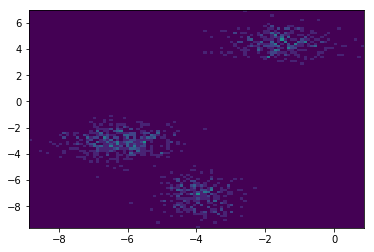

In [108]:
plt.hist2d(data['y'][:,0],data['y'][:,1],bins=[100,100],vmax=10);

In [121]:
res = mod.vb(data, sample_file='output.csv',seed=1)

In [122]:
tab = atpy.Table().read('output.csv',comment='#',format='ascii')

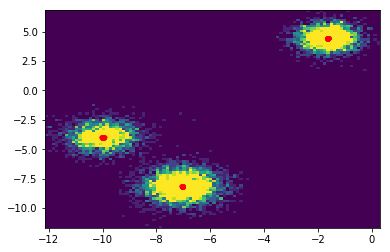

In [124]:
plt.hist2d(data['y'][:,0],data['y'][:,1],bins=[100,100],vmax=10)
for i in range(1,4):
    plt.plot(tab['mu.%d.1'%i],tab['mu.%d.2'%i],'r.')

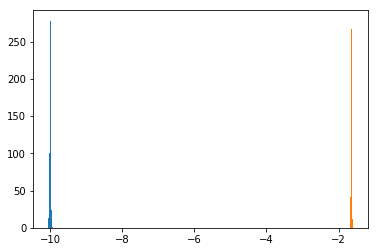

In [125]:
plt.hist( tab['mu.1.1']); plt.hist(tab['mu.2.1']);